<a href="https://colab.research.google.com/github/yashmavuta/Human-Signature-Verification/blob/main/seattle_abb_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
import numpy as np

In [ ]:
# load data
calendar = pd.read_csv('/content/drive/MyDrive/ABB_Seattle/calendar.csv')
listings = pd.read_csv('/content/drive/MyDrive/ABB_Seattle/listings.csv')
reviews = pd.read_csv('/content/drive/MyDrive/ABB_Seattle/reviews.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
calendar.head() # showing first 5 rows of the table

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [ ]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [ ]:
calendar['price'].head()

,price
0,$85.00
1,$85.00
2,NaN
3,NaN
4,NaN


In [ ]:
# changing data type & removing $ sign for better operation.
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
calendar.rename(columns = {'listing_id' : 'id'}, inplace = True)

In [ ]:
# data type of date column in calendar.
calendar['date'] = pd.to_datetime(calendar['date'])

# Total available nights
occup = calendar.groupby('id')['available'].value_counts().unstack().fillna(0)
occup['occupied_nights'] = occup['t']
occup['total_nights'] = occup['t'] + occup['f']
occup = occup[['occupied_nights', 'total_nights']]

# Occupancy rate for each id:
occup['occupancy_rate'] = occup['occupied_nights'] / occup['total_nights']

In [ ]:
# mean price for each id
price = calendar.groupby('id')['price'].mean()
# concat
# occupancy rate and price data into single dataframe
con = pd.concat([occup, price], axis = 1)

# reset the index to include the ID.
con = con.reset_index()

# Rename the column to match your desired output.
con.columns = ['id', 'occupied_nights', 'total_nights', 'occupancy_rate', 'price']

# print the con
con

,id,occupied_nights,total_nights,occupancy_rate,price
0,3335,309.0,365.0,0.846575,120.000000
1,4291,365.0,365.0,1.000000,82.000000
2,5682,309.0,365.0,0.846575,53.944984
3,6606,365.0,365.0,1.000000,92.849315
4,7369,53.0,365.0,0.145205,85.000000
...,...,...,...,...,...
3813,10332096,365.0,365.0,1.000000,40.000000
3814,10334184,361.0,365.0,0.989041,120.000000
3815,10339144,0.0,365.0,0.000000,NaN
3816,10339145,365.0,365.0,1.000000,237.904110


In [ ]:
con.head()  # After cleaning the data in calander

,id,occupied_nights,total_nights,occupancy_rate,price
0,3335,309.0,365.0,0.846575,120.000000
1,4291,365.0,365.0,1.000000,82.000000
2,5682,309.0,365.0,0.846575,53.944984
3,6606,365.0,365.0,1.000000,92.849315
4,7369,53.0,365.0,0.145205,85.000000


In [ ]:
con['occupancy_rate'].value_counts()

,count
occupancy_rate,
1.000000,678
0.000000,95
0.997260,91
0.243836,70
0.989041,53
...,...
0.769863,1
0.690411,1
0.695890,1


In [ ]:
merged_df = pd.merge(listings, con, on = 'id', how = 'inner')

In [ ]:
merged_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,occupied_nights,total_nights,occupancy_rate,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,346.0,365.0,0.947945,85.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,strict,t,t,6,1.48,291.0,365.0,0.797260,170.931271
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,strict,f,f,2,1.15,220.0,365.0,0.602740,1301.818182
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,flexible,f,f,1,NaN,143.0,365.0,0.391781,100.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,strict,f,f,1,0.89,365.0,365.0,1.000000,462.739726


In [ ]:
merged_df.rename(columns = {'price_y' : 'price'}, inplace = True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [ ]:
merged_df.drop('price_x', axis = 1, inplace = True)

In [ ]:
merged_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,occupied_nights,total_nights,occupancy_rate,price
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,346.0,365.0,0.947945,85.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,strict,t,t,6,1.48,291.0,365.0,0.797260,170.931271
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,strict,f,f,2,1.15,220.0,365.0,0.602740,1301.818182
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,flexible,f,f,1,NaN,143.0,365.0,0.391781,100.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,strict,f,f,1,0.89,365.0,365.0,1.000000,462.739726


In [ ]:
merged_df['price']

,price
0,85.000000
1,170.931271
2,1301.818182
3,100.000000
4,462.739726
...,...
3813,359.000000
3814,100.201465
3815,87.886364
3816,99.000000


In [ ]:
# check null
merged_df.isnull().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
name,0
...,...
reviews_per_month,627
occupied_nights,0
total_nights,0
occupancy_rate,0


In [ ]:
new_df = merged_df.loc[:, ['id','price','cleaning_fee','security_deposit','property_type','accommodates','bathrooms','bedrooms','beds','bed_type','number_of_reviews','review_scores_value','room_type','latitude','longitude','occupied_nights','total_nights','occupancy_rate']]
new_df.head()

,id,price,cleaning_fee,security_deposit,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_value,room_type,latitude,longitude,occupied_nights,total_nights,occupancy_rate
0,241032,85.000000,NaN,NaN,Apartment,4,1.0,1.0,1.0,Real Bed,207,10.0,Entire home/apt,47.636289,-122.371025,346.0,365.0,0.947945
1,953595,170.931271,$40.00,$100.00,Apartment,4,1.0,1.0,1.0,Real Bed,43,10.0,Entire home/apt,47.639123,-122.365666,291.0,365.0,0.797260
2,3308979,1301.818182,$300.00,"$1,000.00",House,11,4.5,5.0,7.0,Real Bed,20,10.0,Entire home/apt,47.629724,-122.369483,220.0,365.0,0.602740
3,7421966,100.000000,NaN,NaN,Apartment,3,1.0,0.0,2.0,Real Bed,0,NaN,Entire home/apt,47.638473,-122.369279,143.0,365.0,0.391781
4,278830,462.739726,$125.00,$700.00,House,6,2.0,3.0,3.0,Real Bed,38,9.0,Entire home/apt,47.632918,-122.372471,365.0,365.0,1.000000


In [ ]:
new_df.shape

(3818, 18)

In [ ]:
new_df['security_deposit']

,security_deposit
0,NaN
1,$100.00
2,"$1,000.00"
3,NaN
4,$700.00
...,...
3813,NaN
3814,$500.00
3815,$250.00
3816,$300.00


In [ ]:
new_df['security_deposit'] = new_df['security_deposit'].astype(str).str.replace('$', '').str.replace(',', '')

# converting to float
new_df['security_deposit'] = pd.to_numeric(new_df['security_deposit'], errors='coerce')  # Handle errors gracefully

# If you want to convert to int, you can add this line:
new_df['security_deposit'] = new_df['security_deposit'].fillna(0).astype(int)

In [ ]:
new_df['security_deposit'].dtypes

dtype('int64')

In [ ]:
new_df['security_deposit'].isnull().sum()

0

In [ ]:
new_df

,id,price,cleaning_fee,security_deposit,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_value,room_type,latitude,longitude,occupied_nights,total_nights,occupancy_rate
0,241032,85.000000,NaN,0,Apartment,4,1.0,1.0,1.0,Real Bed,207,10.0,Entire home/apt,47.636289,-122.371025,346.0,365.0,0.947945
1,953595,170.931271,$40.00,100,Apartment,4,1.0,1.0,1.0,Real Bed,43,10.0,Entire home/apt,47.639123,-122.365666,291.0,365.0,0.797260
2,3308979,1301.818182,$300.00,1000,House,11,4.5,5.0,7.0,Real Bed,20,10.0,Entire home/apt,47.629724,-122.369483,220.0,365.0,0.602740
3,7421966,100.000000,NaN,0,Apartment,3,1.0,0.0,2.0,Real Bed,0,NaN,Entire home/apt,47.638473,-122.369279,143.0,365.0,0.391781
4,278830,462.739726,$125.00,700,House,6,2.0,3.0,3.0,Real Bed,38,9.0,Entire home/apt,47.632918,-122.372471,365.0,365.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,359.000000,$230.00,0,House,6,2.0,3.0,3.0,Real Bed,1,8.0,Entire home/apt,47.664295,-122.359170,32.0,365.0,0.087671
3814,8902327,100.201465,$50.00,500,Apartment,4,1.0,1.0,2.0,Real Bed,2,10.0,Entire home/apt,47.649552,-122.318309,273.0,365.0,0.747945
3815,10267360,87.886364,$35.00,250,House,2,1.0,1.0,1.0,Real Bed,0,NaN,Entire home/apt,47.508453,-122.240607,88.0,365.0,0.241096
3816,9604740,99.000000,$45.00,300,Condominium,2,1.0,0.0,1.0,Real Bed,0,NaN,Entire home/apt,47.632335,-122.275530,179.0,365.0,0.490411


In [ ]:
new_df['cleaning_fee'].isnull().sum()

1030

In [ ]:
new_df['cleaning_fee'] = new_df['cleaning_fee'].str.replace('$', '').str.replace(',', '')
new_df['cleaning_fee'].fillna('0', inplace = True)
new_df['cleaning_fee'] = new_df['cleaning_fee'].astype(float)
new_df['cleaning_fee'] = new_df['cleaning_fee'].astype(int)

<ipython-input-30-565a986ff02c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['cleaning_fee'].fillna('0', inplace = True)


In [ ]:
# property types
new_df['property_type'].value_counts()
new_df['property_type'].isnull().sum()

1

In [ ]:
# check for null values in the new_df
new_df.isnull().sum()

,0
id,0
price,95
cleaning_fee,0
security_deposit,0
property_type,1
accommodates,0
bathrooms,16
bedrooms,6
beds,1
bed_type,0


In [ ]:
# Replacing missing values in new_df
new_df['price'].fillna(new_df['price'].mean(), inplace = True) # price
new_df['property_type'].fillna('Apartment', inplace = True) # property type

new_df['bathrooms'].fillna(new_df['bathrooms'].mean(), inplace = True) # bathrooms
new_df['bedrooms'].fillna(new_df['bedrooms'].mean(), inplace = True) # bedrooms

new_df['beds'].fillna(new_df['beds'].mean(), inplace = True) # beds
new_df['review_scores_value'].fillna(new_df['review_scores_value'].mean(), inplace = True) # review_scores_value

<ipython-input-33-724f4771c6ca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['price'].fillna(new_df['price'].mean(), inplace = True) # price
<ipython-input-33-724f4771c6ca>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
# now check null in new_df
new_df.isnull().sum()

,0
id,0
price,0
cleaning_fee,0
security_deposit,0
property_type,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
bed_type,0


In [ ]:
new_df['longitude']

,longitude
0,-122.371025
1,-122.365666
2,-122.369483
3,-122.369279
4,-122.372471
...,...
3813,-122.359170
3814,-122.318309
3815,-122.240607
3816,-122.275530


In [ ]:
new_df.drop('id', axis = 1, inplace = True)

In [ ]:
new_df.describe()

,price,cleaning_fee,security_deposit,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_value,latitude,longitude,occupied_nights,total_nights,occupancy_rate
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.0,3818.000000
mean,135.764060,45.062860,140.566003,3.349398,1.259469,1.307712,1.735394,22.223415,9.452245,47.628961,-122.333103,244.772656,365.0,0.670610
std,96.166147,49.913798,237.387534,1.977599,0.589130,0.882700,1.139330,37.730892,0.682751,0.043052,0.031745,126.772526,0.0,0.347322
min,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,47.505088,-122.417219,0.000000,365.0,0.000000
25%,77.849315,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,9.000000,47.609418,-122.354320,124.000000,365.0,0.339726
50%,110.000000,30.000000,0.000000,3.000000,1.000000,1.000000,1.000000,9.000000,9.452245,47.623601,-122.328874,308.000000,365.0,0.843836
75%,160.000000,65.000000,200.000000,4.000000,1.000000,2.000000,2.000000,26.000000,10.000000,47.662694,-122.310800,360.000000,365.0,0.986301
max,1301.818182,300.000000,5000.000000,16.000000,8.000000,7.000000,15.000000,474.000000,10.000000,47.733358,-122.240607,365.000000,365.0,1.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'cleaning_fee'}>,
        <Axes: title={'center': 'security_deposit'}>,
        <Axes: title={'center': 'accommodates'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'review_scores_value'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'occupied_nights'}>],
       [<Axes: title={'center': 'total_nights'}>,
        <Axes: title={'center': 'occupancy_rate'}>, <Axes: >, <Axes: >]],
      dtype=object)

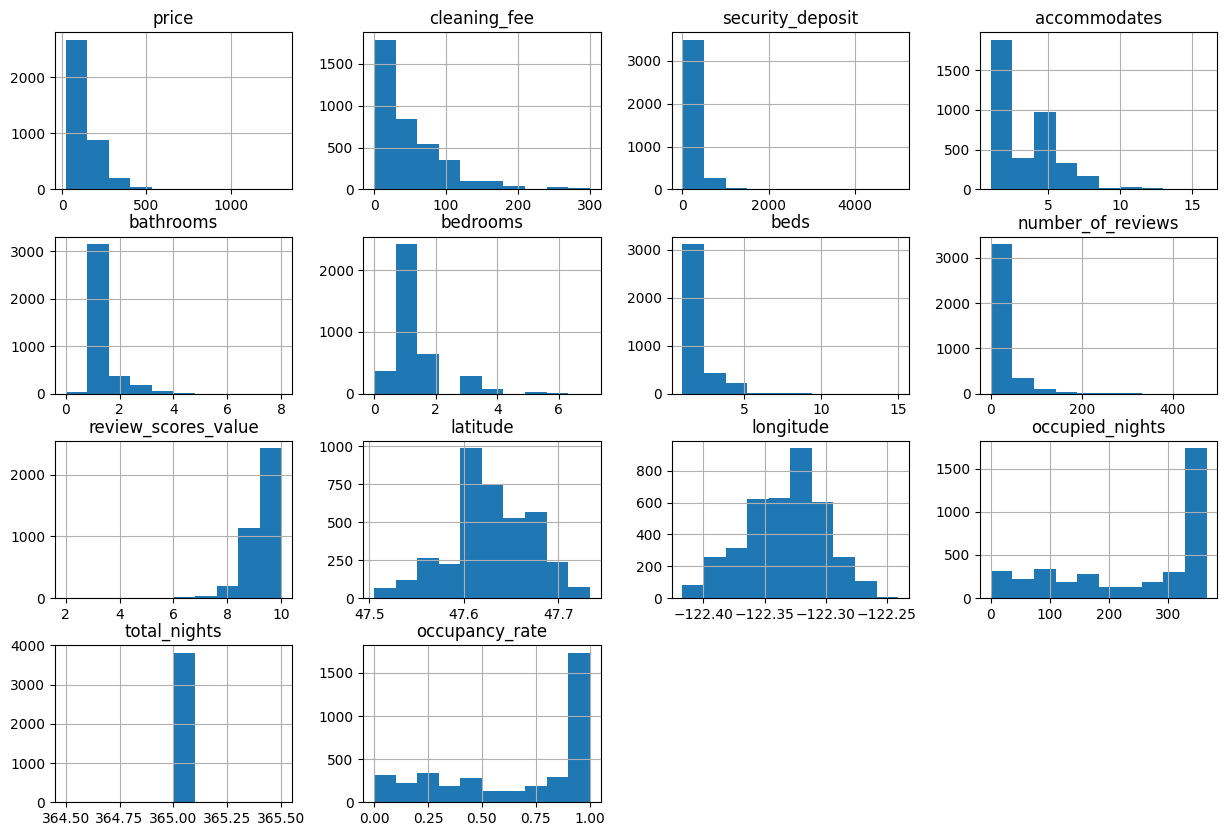

In [ ]:
# Check distribution:
new_df.hist(figsize=(15,10))

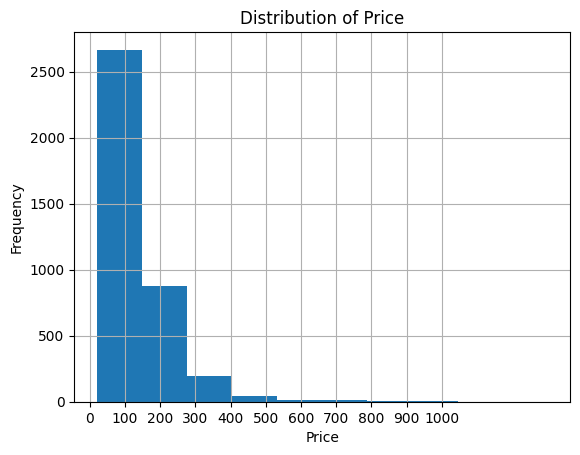

In [ ]:
# distribution of price
new_df['price'].hist()
plt.xlabel('Price')
ticks_x = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.xticks(ticks_x)
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [ ]:
# longitude and latitude as the data and analysis is based on geographical proximity.


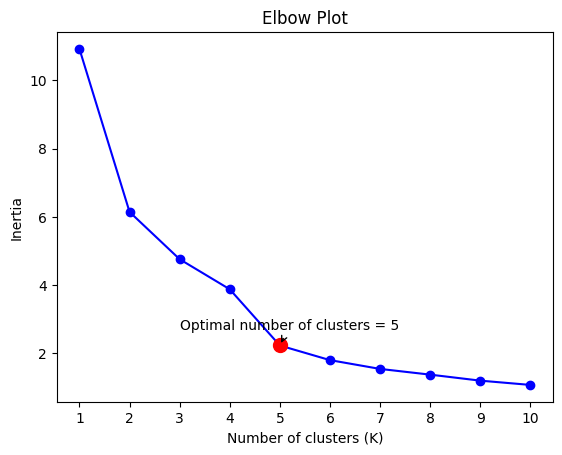

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = np.array(new_df[['longitude', 'latitude']])  # Change column names as needed

# Initialize an empty list to hold the values of the inertia for each K
inertias = []

# Create a range of K values to test
k_values = range(1, 11)

# Loop through the range of K values
for k in k_values:
    # Initialize the KMeans model with the current value of K
    model = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    model.fit(X)

    # Add the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot the elbow graph
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.xticks(k_values)

# Highlight the optimal number of clusters (example: K=5, adjust as needed)
optimal_k = 5  # Update this based on your observations
plt.plot(optimal_k, inertias[optimal_k - 1], 'ro', markersize=10)
plt.annotate(
    f'Optimal number of clusters = {optimal_k}',
    xy=(optimal_k, inertias[optimal_k - 1]),
    xytext=(optimal_k - 2, inertias[optimal_k - 1] * 1.2),
    arrowprops=dict(facecolor='black', arrowstyle='->')
)
plt.show()

In [ ]:
# based on the number of cluster by elbow method:

<Axes: xlabel='longitude', ylabel='latitude'>

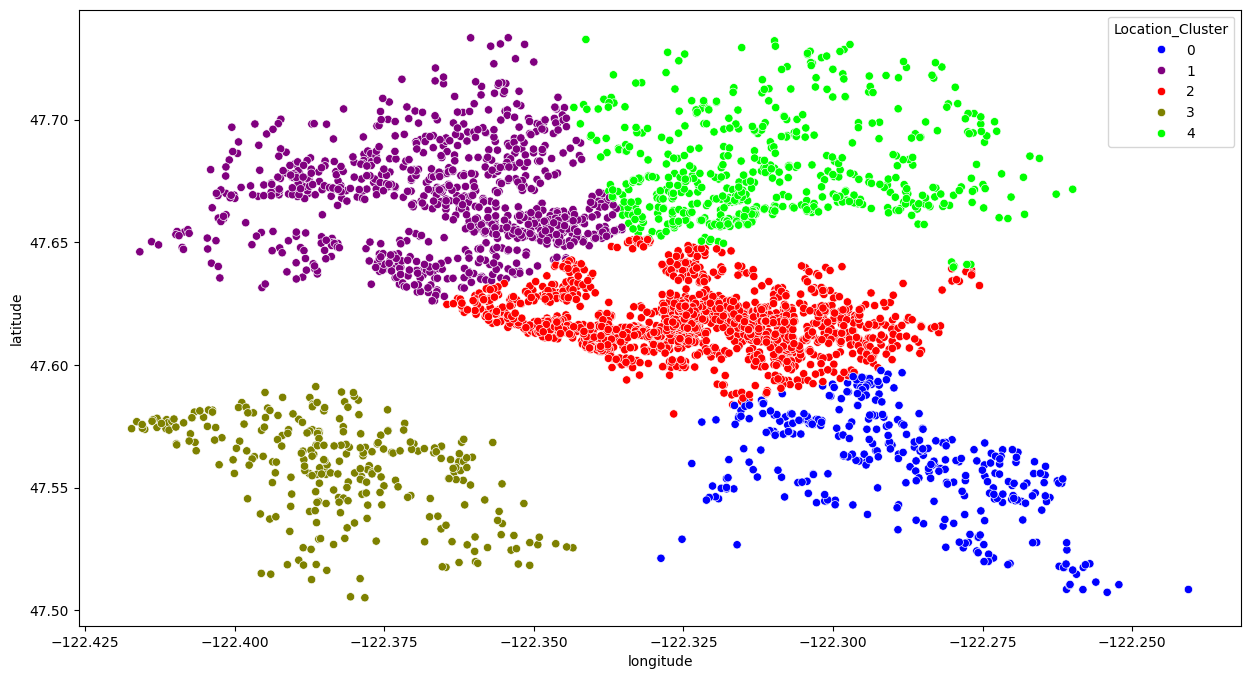

In [ ]:

from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)

# fit the model
model.fit(new_df[['longitude','latitude']])

# assign a cluster to each example
yhat = pd.DataFrame(model.predict(new_df[['longitude','latitude']]),columns=['Location_Cluster'])

if 'Location_Cluster' not in con:
      con = pd.concat([new_df.set_index(yhat.index),yhat],axis=1)
else:
      con['Location_Cluster'] = yhat
colors = ['#747FE3', '#8EE35D', '#E37346']
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude', y='latitude', data = con, hue='Location_Cluster', palette = "brg")


In [ ]:
new_df.head(2)

,price,cleaning_fee,security_deposit,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_value,room_type,latitude,longitude,occupied_nights,total_nights,occupancy_rate
0,85.000000,0,0,Apartment,4,1.0,1.0,1.0,Real Bed,207,10.0,Entire home/apt,47.636289,-122.371025,346.0,365.0,0.947945
1,170.931271,40,100,Apartment,4,1.0,1.0,1.0,Real Bed,43,10.0,Entire home/apt,47.639123,-122.365666,291.0,365.0,0.797260


**NEW CLUSTERS FROM HERE**

In [ ]:
cluster_df = [pd.DataFrame() for _ in range(5)]

for label, sample in zip(yhat['Location_Cluster'], new_df.values):
    sample_df = pd.DataFrame([sample], columns=new_df.columns)
    cluster_df[label] = pd.concat([cluster_df[label], sample_df], ignore_index=True)

df_cluster_1 = cluster_df[0]
df_cluster_2 = cluster_df[1]
df_cluster_3 = cluster_df[2]
df_cluster_4 = cluster_df[3]
df_cluster_5 = cluster_df[4]


In [ ]:
print("df_cluster_1: ")
print(df_cluster_1.head())

print("df_cluster_2: ")
print(df_cluster_2.head())

print("df_cluster_3: ")
print(df_cluster_3.head())

print("df_cluster_4: ")
print(df_cluster_4.head())

print("df_cluster_5: ")
print(df_cluster_5.head())

df_cluster_1: 
        price  cleaning_fee  security_deposit property_type  accommodates  \
0  279.000000           200               250         House             5   
1  138.137184             0                 0         House             4   
2   92.500000            30                 0         House             2   
3  249.397590           112               300         House             6   
4  257.000000           100               250         House             7   

   bathrooms  bedrooms  beds  bed_type  number_of_reviews  \
0        3.0       3.0   5.0  Real Bed                  1   
1        1.0       1.0   3.0  Real Bed                  0   
2        1.0       1.0   1.0  Real Bed                  1   
3        2.0       2.0   2.0  Real Bed                  0   
4        2.5       3.0   3.0  Real Bed                  1   

   review_scores_value        room_type   latitude   longitude  \
0            10.000000  Entire home/apt  47.596801 -122.288461   
1             9.452245 

In [ ]:
df_1 = pd.DataFrame(df_cluster_1)
df_1.shape

(348, 17)

In [ ]:
df_2 = pd.DataFrame(df_cluster_2)
df_2.shape

(897, 17)

In [ ]:
df_3 = pd.DataFrame(df_cluster_3)
df_3.shape

(1711, 17)

In [ ]:
df_4 = pd.DataFrame(df_cluster_4)
df_4.shape

(283, 17)

In [ ]:
df_5 = pd.DataFrame(df_cluster_5)
df_5.shape

(579, 17)

In [ ]:
df_1 = pd.DataFrame(df_cluster_1)
df_1.shape
df_1.to_csv("cluster1.csv")

In [ ]:
df_2 = pd.DataFrame(df_cluster_2)
df_2.shape
df_2.to_csv("cluster2.csv")

In [ ]:
df_3 = pd.DataFrame(df_cluster_3)
df_3.shape
df_3.to_csv("cluster3.csv")

In [ ]:
df_4 = pd.DataFrame(df_cluster_4)
df_4.shape
df_4.to_csv("cluster4.csv")

In [ ]:
df_5 = pd.DataFrame(df_cluster_5)
df_5.shape
df_5.to_csv("cluster5.csv")